# 1. Introduction

## Overview of the project
The `Stock Market Sector Performance Analysis` project aims to analyze and compare the performance of various market sectors using historical stock price data from January 1, 2020, to July 13, 2024. By utilizing the `yfinance` API, the project collects data for selected stocks across different sectors, such as:

1. **Energy**:
   - ExxonMobil (XOM)
   - Chevron (CVX)
   - ConocoPhillips (COP)
   - Schlumberger (SLB)
   - Occidental Petroleum (OXY)
<br>
2. **Consumer Discretionary**:
   - Amazon (AMZN)
   - Tesla (TSLA)
   - Home Depot (HD)
   - McDonald's (MCD)
   - Nike (NKE)
<br>
3. **Health Care**:
   - Johnson & Johnson (JNJ)
   - UnitedHealth Group (UNH)
   - Pfizer (PFE)
   - Merck (MRK)
   - AbbVie (ABBV)
<br>
4. **Financials**:
   - JPMorgan Chase (JPM)
   - Bank of America (BAC)
   - Wells Fargo (WFC)
   - Citigroup (C)
   - Goldman Sachs (GS)
<br>
5. **Information Technology**:
   - Apple (AAPL)
   - Microsoft (MSFT)
   - Alphabet (GOOGL)
   - NVIDIA (NVDA)
   - Meta Platforms (META)
<br>
6. **Real Estate**:
   - American Tower (AMT)
   - Prologis (PLD)
   - Crown Castle (CCI)
   - Public Storage (PSA)
   - Equinix (EQIX)

## Objectives and goals
The primary objective is to calculate the average returns for each sector over this period and visualize the performance through various charts and graphs. This analysis will help identify which sectors have performed well and provide insights into market dynamics.

The findings from this analysis can be valuable for investors, financial analysts, and anyone interested in understanding sector performance in the stock market.

---
# 2. Data Collection

In [74]:
# run this command for installing `yfinance` library
#!pip install yfinance

In [75]:
# Import libraries
import yfinance as yf
import pandas as pd

In [76]:
# Define the list of stock tickers for each sector
sectors = {
    'Energy': ['XOM', 'CVX', 'COP', 'SLB', 'OXY'],
    'Consumer Discretionary': ['AMZN', 'TSLA', 'HD', 'MCD', 'NKE'],
    'Health Care': ['JNJ', 'UNH', 'PFE', 'MRK', 'ABBV'],
    'Financials': ['JPM', 'BAC', 'WFC', 'C', 'GS'],
    'Information Technology': ['AAPL', 'MSFT', 'GOOGL', 'NVDA', 'META'],
    'Real Estate': ['AMT', 'PLD', 'CCI', 'PSA', 'EQIX']
}

# Define the date range
start_date = '2020-01-01'
end_date = '2024-07-13'

In [77]:
# Download historical price data for each stock
data = {}
for sector, tickers in sectors.items():
    sector_data = []
    for ticker in tickers:
        stock_data = yf.download(ticker, start=start_date, end=end_date)['Adj Close']
        sector_data.append(stock_data)
    data[sector] = pd.concat(sector_data, axis=1)
    data[sector].columns = tickers

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [78]:
# Inspect the data for each sector
for sector in data.keys():
    print(f"\nSector: {sector}")
    print(data[sector].info())
    print(data[sector].head())


Sector: Energy
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1139 entries, 2020-01-02 to 2024-07-12
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   XOM     1139 non-null   float64
 1   CVX     1139 non-null   float64
 2   COP     1139 non-null   float64
 3   SLB     1139 non-null   float64
 4   OXY     1139 non-null   float64
dtypes: float64(5)
memory usage: 53.4 KB
None
                  XOM        CVX        COP        SLB        OXY
Date                                                             
2020-01-02  56.539867  99.316284  55.158283  36.443527  40.067577
2020-01-03  56.085312  98.972778  55.360512  36.797348  41.036793
2020-01-06  56.515945  98.637444  56.017761  37.033230  42.391830
2020-01-07  56.053402  97.377892  56.017761  36.842709  42.598850
2020-01-08  55.208107  96.265541  54.720112  35.754032  42.325962

Sector: Consumer Discretionary
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1139 ent

---
# 3. Data Cleaning & Preprocessing

The next step after data collection is` Data Cleaning & Preprocessing`. This step ensures that the data is in the correct format and is ready for analysis. Here are the steps involved in data cleaning and preprocessing:


In [79]:
# Handle missing values
for sector in data.keys():
    data[sector] = data[sector].ffill()  # Forward fill

In [81]:
# Ensure date ranges match across all stocks in each sector
for sector in data.keys():
    print(f"\nSector: {sector} - Date Range Check")
    print(data[sector].head(1).index)
    print(data[sector].tail(1).index)


Sector: Energy - Date Range Check
DatetimeIndex(['2020-01-02'], dtype='datetime64[ns]', name='Date', freq=None)
DatetimeIndex(['2024-07-12'], dtype='datetime64[ns]', name='Date', freq=None)

Sector: Consumer Discretionary - Date Range Check
DatetimeIndex(['2020-01-02'], dtype='datetime64[ns]', name='Date', freq=None)
DatetimeIndex(['2024-07-12'], dtype='datetime64[ns]', name='Date', freq=None)

Sector: Health Care - Date Range Check
DatetimeIndex(['2020-01-02'], dtype='datetime64[ns]', name='Date', freq=None)
DatetimeIndex(['2024-07-12'], dtype='datetime64[ns]', name='Date', freq=None)

Sector: Financials - Date Range Check
DatetimeIndex(['2020-01-02'], dtype='datetime64[ns]', name='Date', freq=None)
DatetimeIndex(['2024-07-12'], dtype='datetime64[ns]', name='Date', freq=None)

Sector: Information Technology - Date Range Check
DatetimeIndex(['2020-01-02'], dtype='datetime64[ns]', name='Date', freq=None)
DatetimeIndex(['2024-07-12'], dtype='datetime64[ns]', name='Date', freq=None)

Sec

---
# 4. Exploratory Data Analysis (EDA)
In this step, we will perform Exploratory Data Analysis (EDA) to gain insights into the data. This includes generating summary statistics, creating visualizations to explore trends and patterns, and documenting initial observations.

In [82]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [160]:
# Function to plot historical prices for a sector
def plot_historical_prices(data, sector_name, ax):
    for ticker in data.columns:
        ax.plot(data[ticker], label=ticker)
    ax.set_title(f'Historical Prices for {sector_name} Sector')
    ax.set_xlabel('Date')
    ax.set_ylabel('Adjusted Close Price')
    ax.legend()

# Function to plot frequency distribution of monthly returns
def plot_frequency_distribution(monthly_returns, sector_name, ax):
    # Define the common x-ticks range for histogram
    x_ticks_range = np.linspace(-0.3, 0.3, num=13)
    
    # Define the common y-ticks range for histogram
    y_ticks_range = np.arange(0, 13, 2)
    
    sns.histplot(monthly_returns[sector_name], bins=20, kde=True, ax=ax)
    ax.set_title(f'{sector_name} Monthly Returns Distribution')
    ax.set_xlabel('Monthly Return')
    ax.set_ylabel('Frequency')
    ax.set_xticks(x_ticks_range)
    ax.set_yticks(y_ticks_range)


In [169]:
# Calculate the average adjusted close prices for each sector
average_prices = {}

for sector in data.keys():
    average_prices[sector] = data[sector].mean(axis=1)

# Convert the dictionary to a DataFrame
average_prices_df = pd.DataFrame(average_prices)

In [170]:
# Resample the data to monthly frequency and calculate the percentage change
monthly_price_change = average_prices_df.resample('M').ffill().pct_change().dropna()

/var/folders/bf/26td72cx2qb7f72d8903rzcc0000gn/T/ipykernel_80753/758468816.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_price_change = average_prices_df.resample('M').ffill().pct_change().dropna()


               XOM          CVX          COP          SLB          OXY
count  1139.000000  1139.000000  1139.000000  1139.000000  1139.000000
mean     74.336961   121.101799    78.155004    36.430756    43.296080
std      29.512192    35.994475    32.962061    13.452291    20.194495
min      25.440153    44.864269    19.237532    11.093632     8.622636
25%      49.059408    88.471874    47.237534    25.945060    24.884351
50%      77.718758   136.512711    85.277374    36.162285    55.506413
75%     102.797802   153.530907   110.035446    48.413795    61.303265
max     121.215431   176.953262   132.675964    61.062260    74.376419


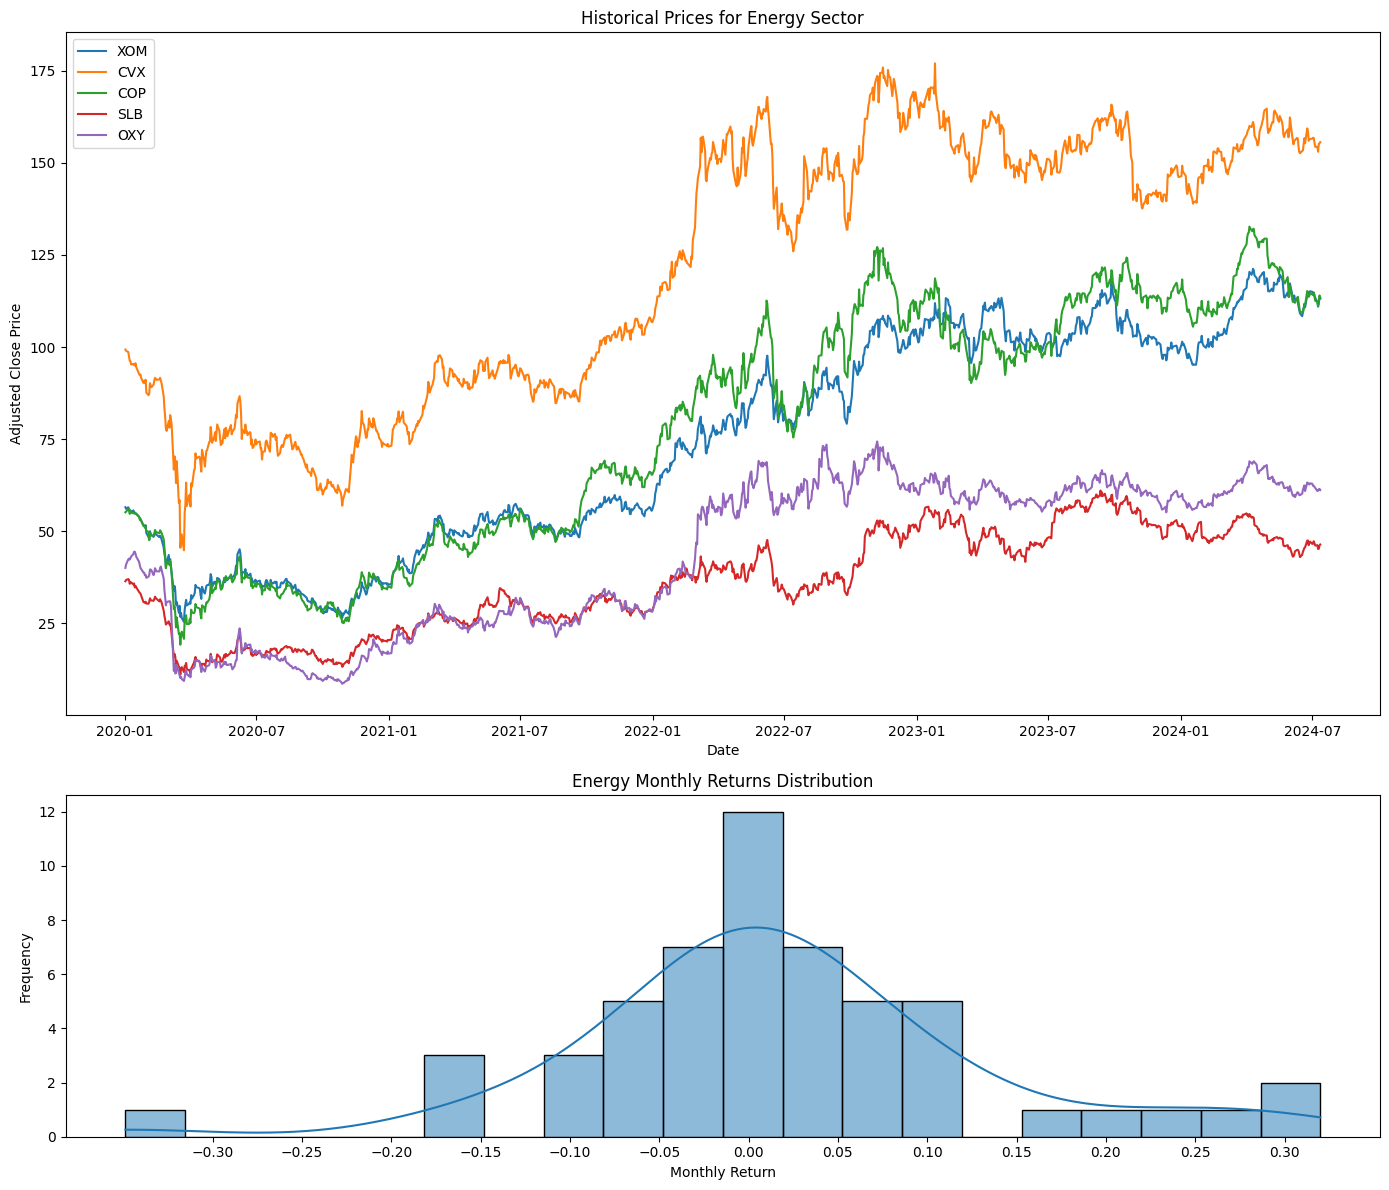

In [171]:
# Energy Sector Visualizations
sector = 'Energy'
print(data[sector].describe())

# Create a figure with two subplots: one for the line chart and one for the histogram
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 12), gridspec_kw={'height_ratios': [2, 1]})

# Plot historical prices for the Energy sector
plot_historical_prices(data[sector], sector, ax1)

# Plot the histogram for the Energy sector's monthly returns
plot_frequency_distribution(monthly_price_change, sector, ax2)

# Adjust layout to ensure both plots fit well
plt.tight_layout()
plt.show()


## Conclusion
- CVX and XOM have shown significant growth from early 2022 to mid-2023, with some fluctuations.
- COP, SLB, and OXY have also grown but with higher volatility.
- The general trend for all stocks in this sector is upward with periodic dips, indicating a strong overall performance despite market fluctuations.
  
- The distribution is approximately normal, centered around 0% monthly return.
- There are a few outliers on both the negative and positive sides, with monthly returns ranging from about -0.30 to 0.30.
- The majority of returns fall between -0.10 and 0.10.


              AMZN         TSLA           HD          MCD          NKE
count  1139.000000  1139.000000  1139.000000  1139.000000  1139.000000
mean    141.859547   206.774609   288.612869   234.369959   115.315659
std      29.122759    81.325169    46.629604    36.918834    22.439051
min      81.820000    24.081333   137.325684   124.335876    60.024521
25%     117.928753   168.134995   258.715729   204.826141    98.037270
50%     149.327499   216.500000   290.738434   237.684036   110.229004
75%     165.269501   257.360001   316.210434   262.938095   128.999413
max     200.000000   409.970001   392.471649   296.902130   171.783463


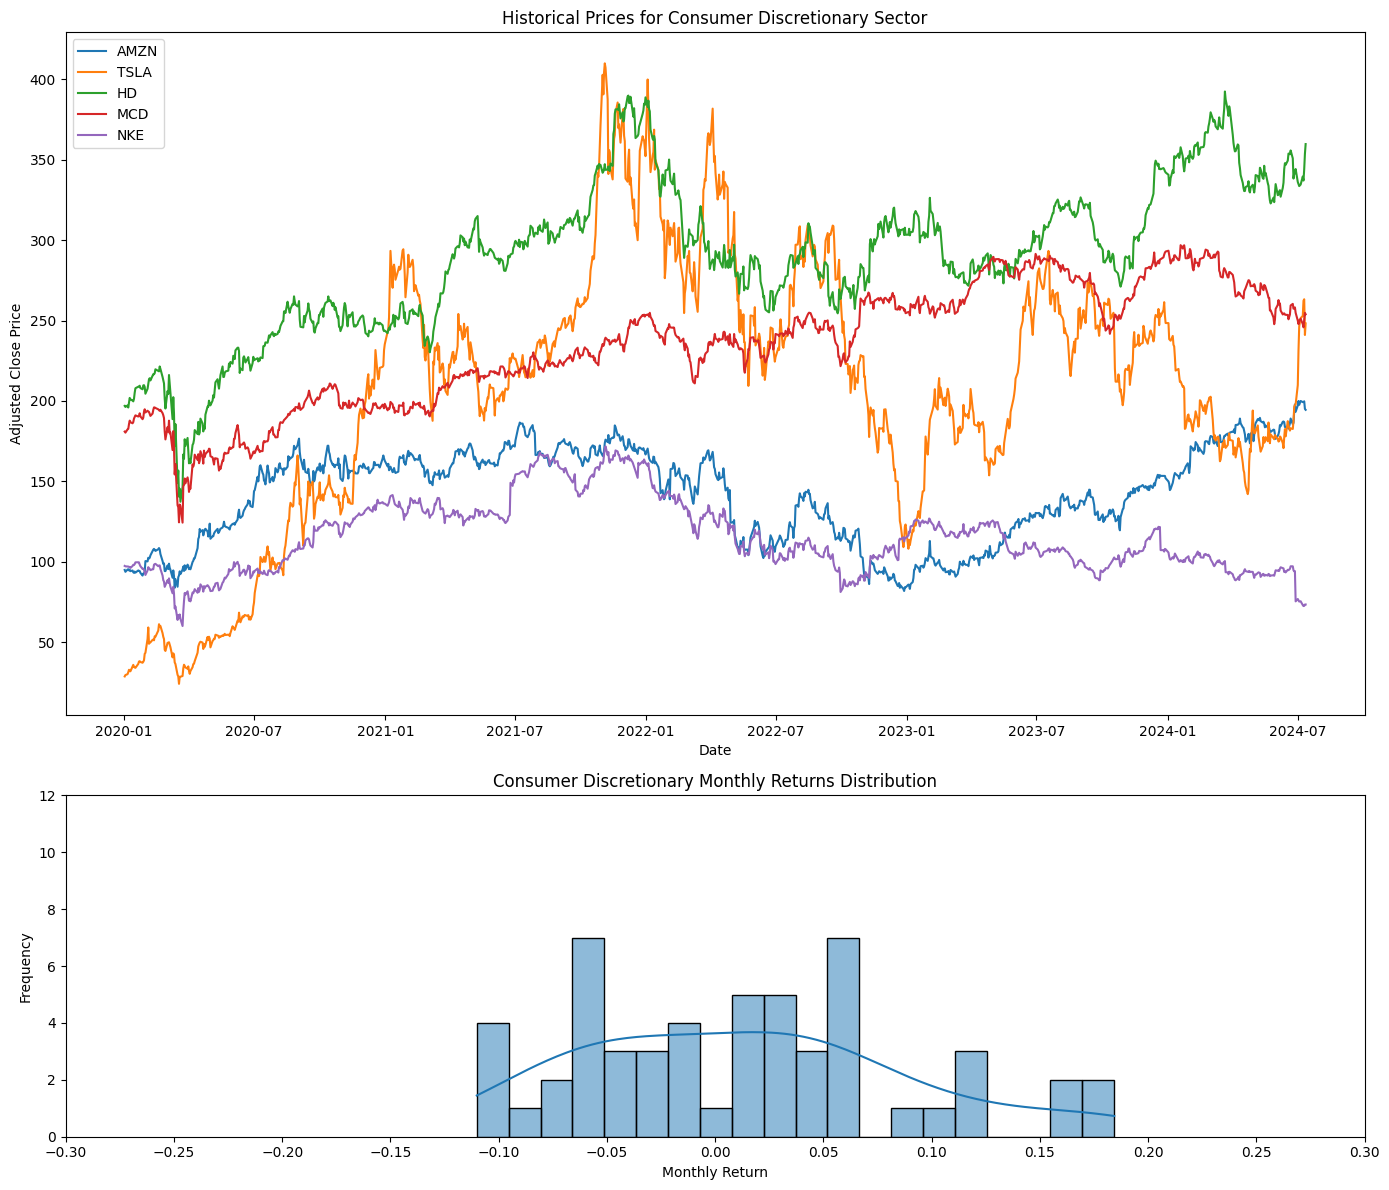

In [162]:
# Energy Sector Visualizations
sector = 'Consumer Discretionary'
print(data[sector].describe())

# Create a figure with two subplots: one for the line chart and one for the histogram
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 12), gridspec_kw={'height_ratios': [2, 1]})

# Plot historical prices for the Energy sector
plot_historical_prices(data[sector], sector, ax1)

# Plot the histogram for the Energy sector's monthly returns
plot_frequency_distribution(monthly_price_change, sector, ax2)

# Adjust layout to ensure both plots fit well
plt.tight_layout()
plt.show()

## Conclusion
- TSLA shows the most volatility with significant peaks and troughs.
- AMZN, HD, and MCD show relatively stable growth with occasional fluctuations.
- The overall trend indicates steady growth with TSLA contributing to most of the volatility in this sector.

- The distribution is more dispersed compared to the Energy sector.
- There is no clear central tendency, indicating higher volatility.
- The distribution shows multiple peaks, suggesting the presence of significant events impacting returns.

               JNJ          UNH          PFE          MRK         ABBV
count  1139.000000  1139.000000  1139.000000  1139.000000  1139.000000
mean    150.387376   423.570300    35.768815    86.889683   120.851551
std      12.652276    90.977136     7.344127    20.610753    31.660224
min      98.888351   183.182266    22.702326    55.622528    53.663048
25%     145.355141   334.981094    29.572489    68.959991    93.407761
50%     152.685165   463.991577    34.378815    79.836700   130.708221
75%     158.886497   497.026917    41.862179   104.545246   145.124962
max     174.296158   546.607117    55.076660   132.960007   180.415100


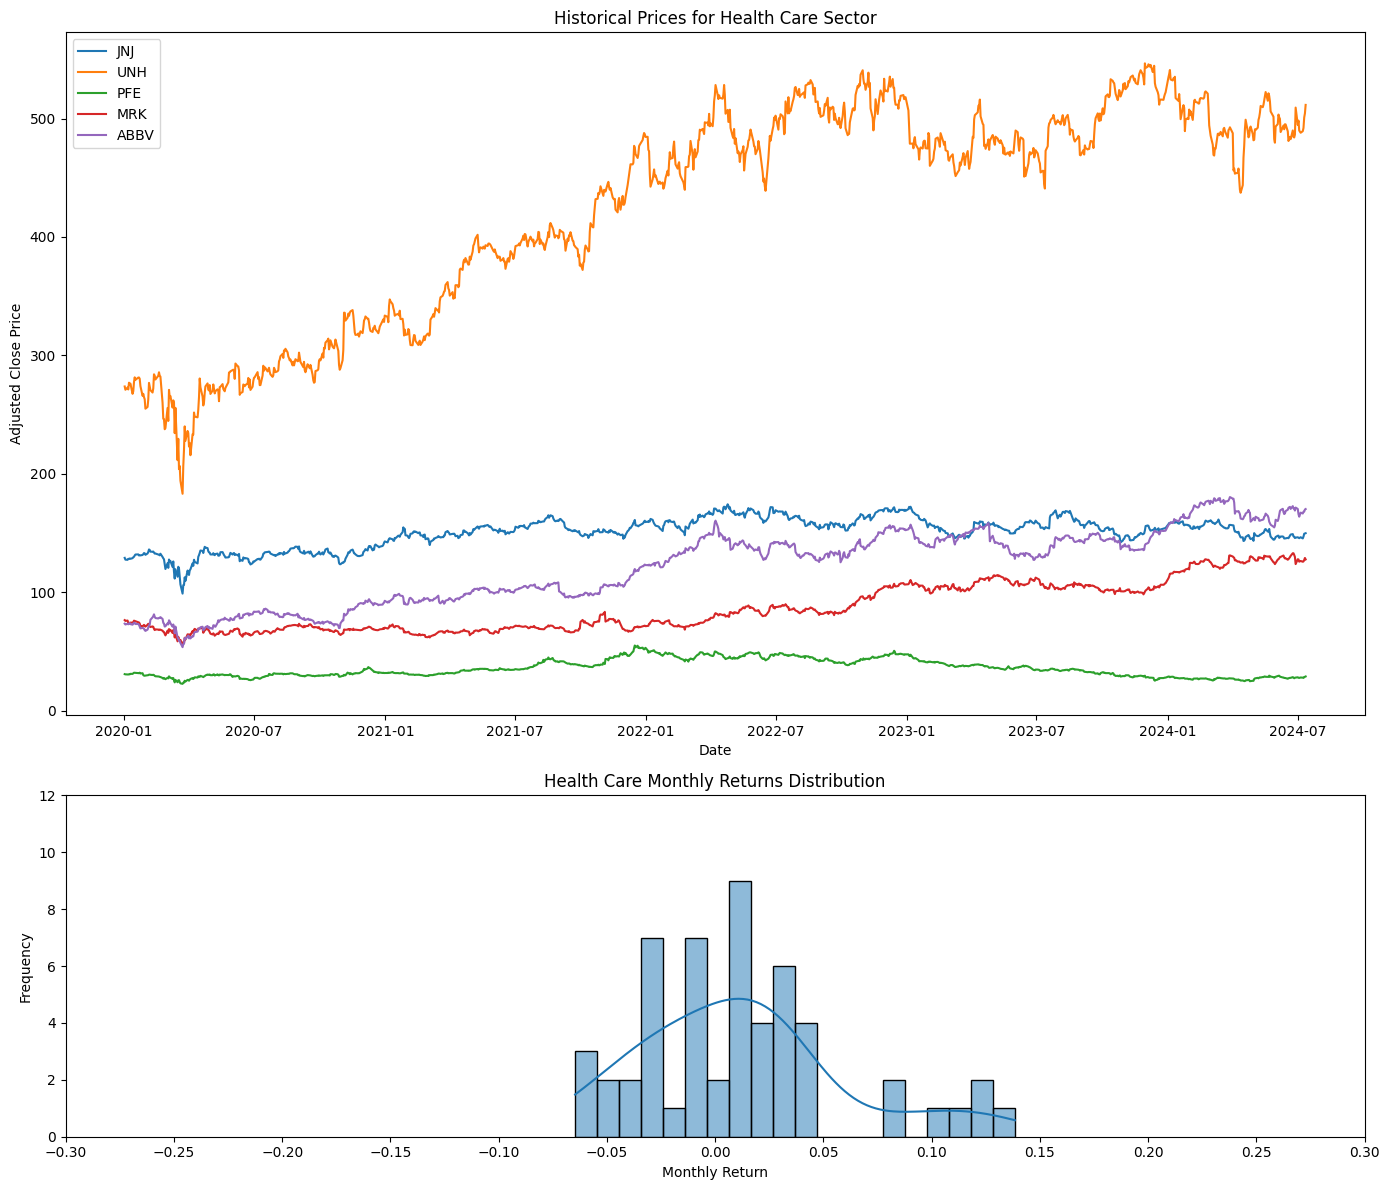

In [163]:
# Energy Sector Visualizations
sector = 'Health Care'
print(data[sector].describe())

# Create a figure with two subplots: one for the line chart and one for the histogram
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 12), gridspec_kw={'height_ratios': [2, 1]})

# Plot historical prices for the Energy sector
plot_historical_prices(data[sector], sector, ax1)

# Plot the histogram for the Energy sector's monthly returns
plot_frequency_distribution(monthly_price_change, sector, ax2)

# Adjust layout to ensure both plots fit well
plt.tight_layout()
plt.show()

## Conclusion
- UNH shows significant growth with a clear upward trend.
- JNJ, PFE, MRK, and ABBV show steady growth with minor fluctuations.
- The general trend for the health care sector is positive, driven mainly by UNH's strong performance.

- The distribution is skewed slightly to the right (positive skew).


               JPM          BAC          WFC            C           GS
count  1139.000000  1139.000000  1139.000000  1139.000000  1139.000000
mean    131.869689    31.959545    40.300516    50.901479   305.465725
std      29.647221     6.456418     9.830356     9.414700    75.158626
min      69.256462    16.262653    19.419762    29.984589   121.462898
25%     110.782772    27.447451    36.491999    43.555984   275.078964
50%     134.260223    31.993959    41.601845    48.296391   317.331146
75%     146.802574    36.864088    45.496269    60.415970   353.354691
max     207.800003    46.190929    62.340000    71.015602   479.880005


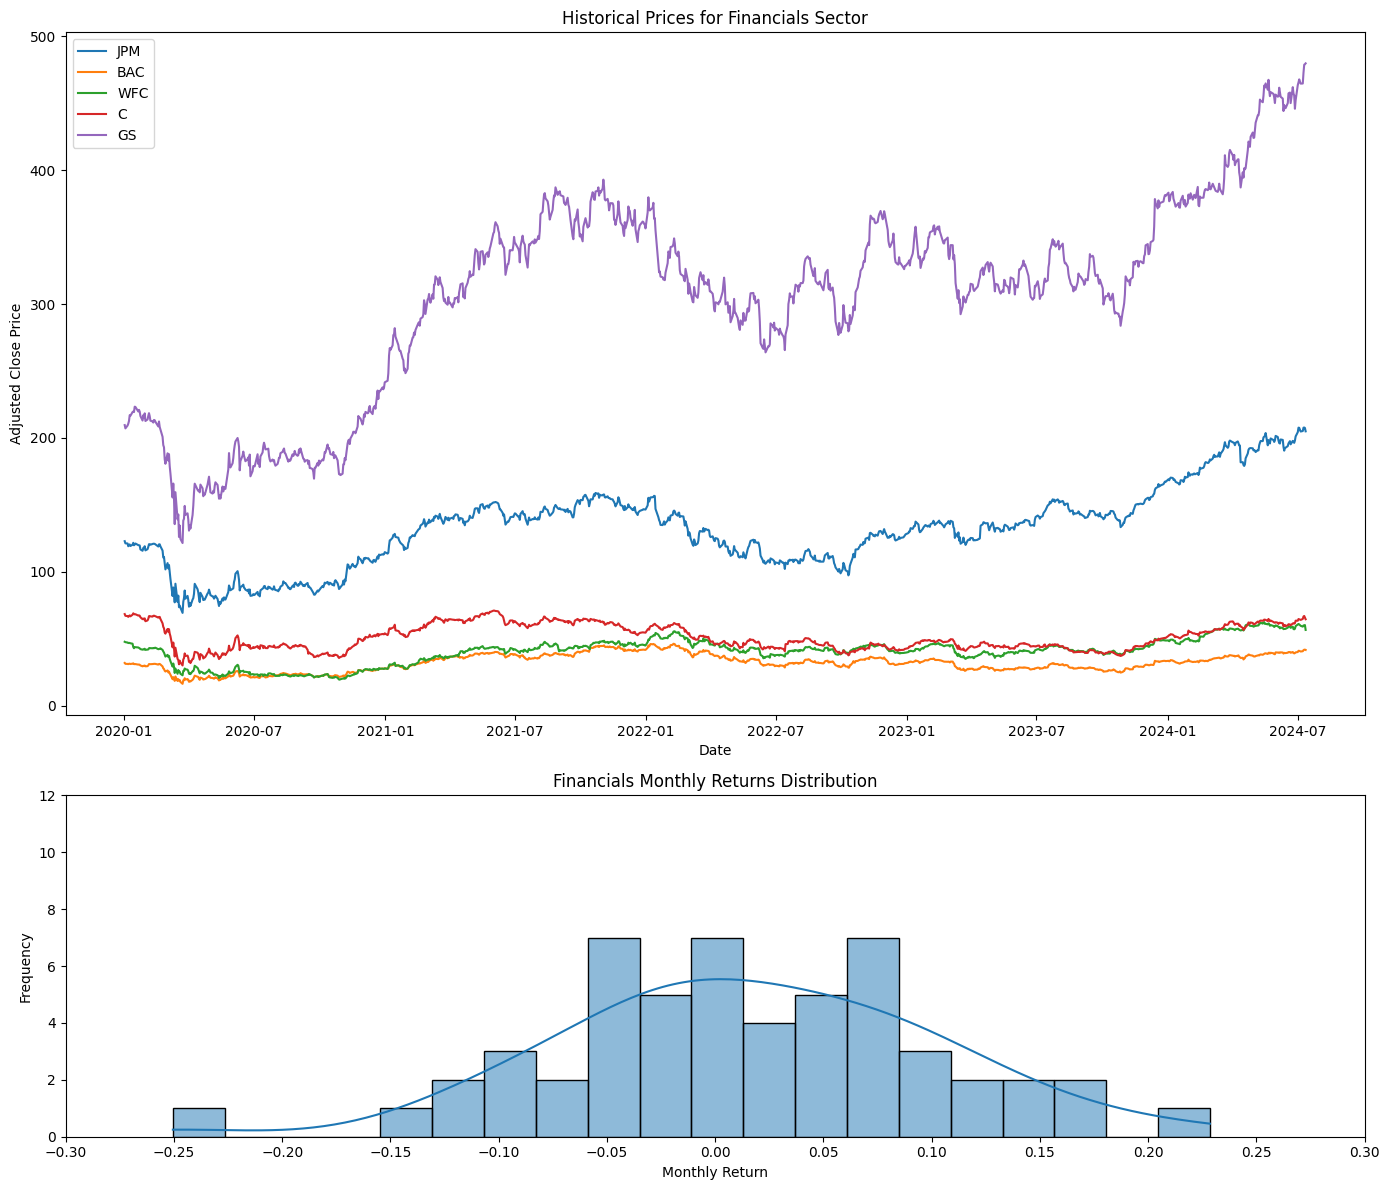

In [164]:
# Energy Sector Visualizations
sector = 'Financials'
print(data[sector].describe())

# Create a figure with two subplots: one for the line chart and one for the histogram
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 12), gridspec_kw={'height_ratios': [2, 1]})

# Plot historical prices for the Energy sector
plot_historical_prices(data[sector], sector, ax1)

# Plot the histogram for the Energy sector's monthly returns
plot_frequency_distribution(monthly_price_change, sector, ax2)

# Adjust layout to ensure both plots fit well
plt.tight_layout()
plt.show()

## Conclusion
- GS shows strong growth with a steep upward trend.
- JPM, BAC, and WFC exhibit steady growth with minor fluctuations.
- The overall performance of the financials sector is positive, with GS leading the growth.

- The distribution is approximately normal, centered around 0% monthly return.

              AAPL         MSFT        GOOGL         NVDA         META
count  1139.000000  1139.000000  1139.000000  1139.000000  1139.000000
mean    144.603703   276.136034   113.612325    29.097837   274.610225
std      35.557028    73.300828    29.118457    25.919689    98.599606
min      54.632893   130.375610    52.646080     4.893182    88.727669
25%     124.105499   224.559723    90.311352    13.344495   202.314262
50%     147.188278   268.523499   115.209274    19.467810   270.414307
75%     171.977242   324.188980   136.228653    33.126467   329.472946
max     232.979996   467.559998   191.179993   135.580002   539.909973


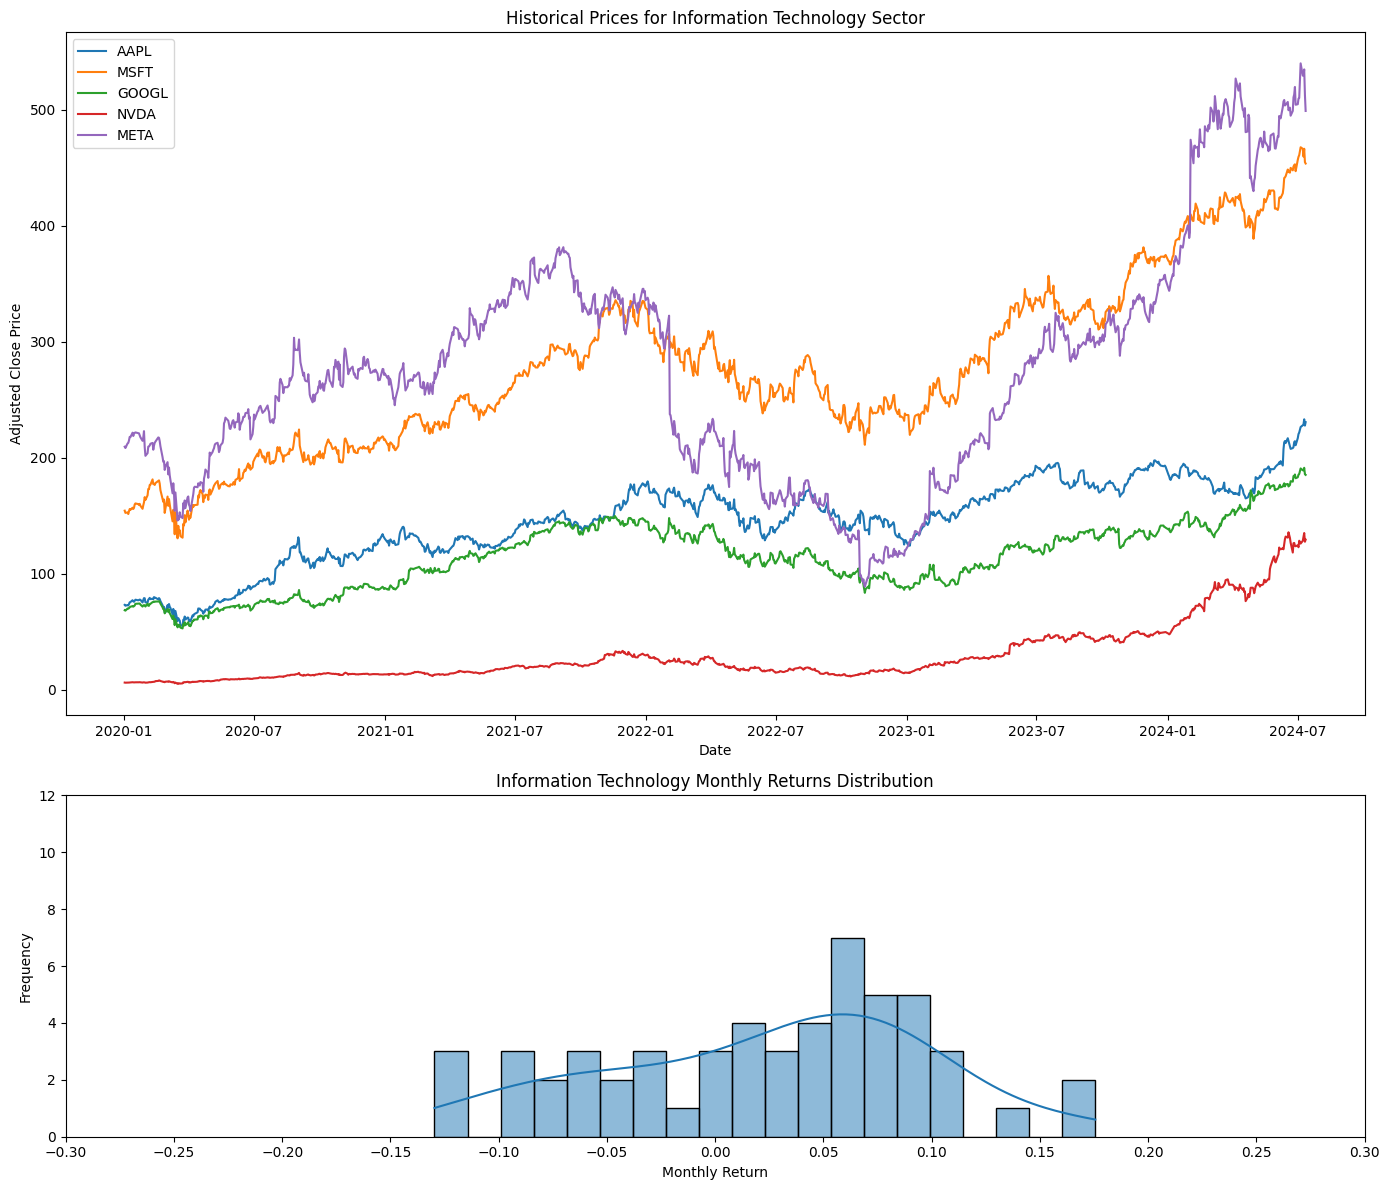

In [165]:
# Energy Sector Visualizations
sector = 'Information Technology'
print(data[sector].describe())

# Create a figure with two subplots: one for the line chart and one for the histogram
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 12), gridspec_kw={'height_ratios': [2, 1]})

# Plot historical prices for the Energy sector
plot_historical_prices(data[sector], sector, ax1)

# Plot the histogram for the Energy sector's monthly returns
plot_frequency_distribution(monthly_price_change, sector, ax2)

# Adjust layout to ensure both plots fit well
plt.tight_layout()
plt.show()

## Conclusion
- NVDA shows significant growth with a steep upward trend.
- AAPL, MSFT, GOOGL, and META also show strong growth but with less steep trends compared to NVDA.
- The technology sector exhibits robust growth driven by NVDA and supported by other tech giants like AAPL and MSFT.

- The distribution is slightly right-skewed.
- The KDE line shows a peak around the 5% return mark, indicating a tendency for positive returns.

               AMT          PLD          CCI          PSA         EQIX
count  1139.000000  1139.000000  1139.000000  1139.000000  1139.000000
mean    213.429794   111.206643   133.411456   252.600100   698.987818
std      26.499269    19.546082    24.977142    49.902412    77.293732
min     152.233627    56.467068    82.224625   133.599930   453.918274
25%     193.360786    95.493900   110.612827   200.340187   648.085052
50%     210.971313   112.620483   135.803314   269.934753   698.799011
75%     232.799187   122.567459   155.123161   282.851212   759.514221
max     278.531555   162.293381   184.678879   371.257050   908.765869


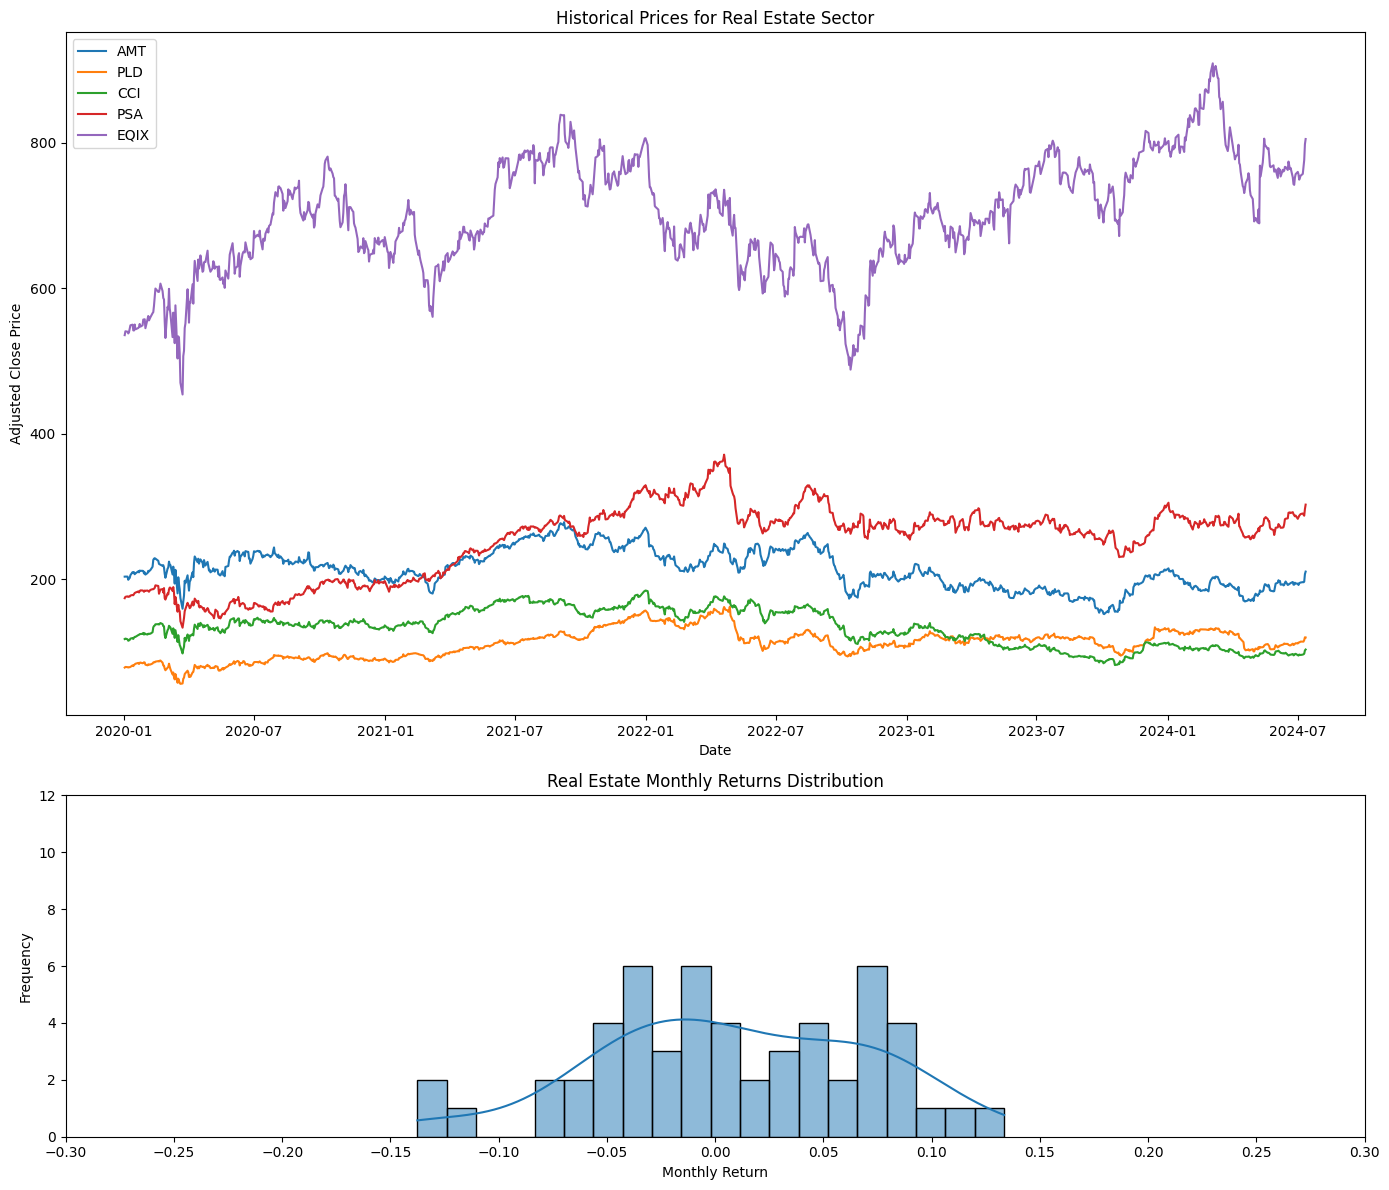

In [166]:
# Energy Sector Visualizations
sector = 'Real Estate'
print(data[sector].describe())

# Create a figure with two subplots: one for the line chart and one for the histogram
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 12), gridspec_kw={'height_ratios': [2, 1]})

# Plot historical prices for the Energy sector
plot_historical_prices(data[sector], sector, ax1)

# Plot the histogram for the Energy sector's monthly returns
plot_frequency_distribution(monthly_price_change, sector, ax2)

# Adjust layout to ensure both plots fit well
plt.tight_layout()
plt.show()

## Conclusion
- EQIX shows the most significant growth with an upward trend.
- AMT, PLD, CCI, and PSA show steady growth with occasional fluctuations.
- The overall trend in the real estate sector is positive, with EQIX showing the most notable growth.

- The distribution is slightly right-skewed.
- The KDE line shows a peak around the 0% return mark, indicating a balance between positive and negative returns.


---
To visualize the overall performance of each sector, we will create a single line plot where each line represents the average performance of a sector. Here are the steps:

1. Calculate the average adjusted close prices for each sector.
2. Create a single DataFrame that includes the average adjusted close prices for all sectors.
3. Plot the overall performance of each sector on a single line chart.

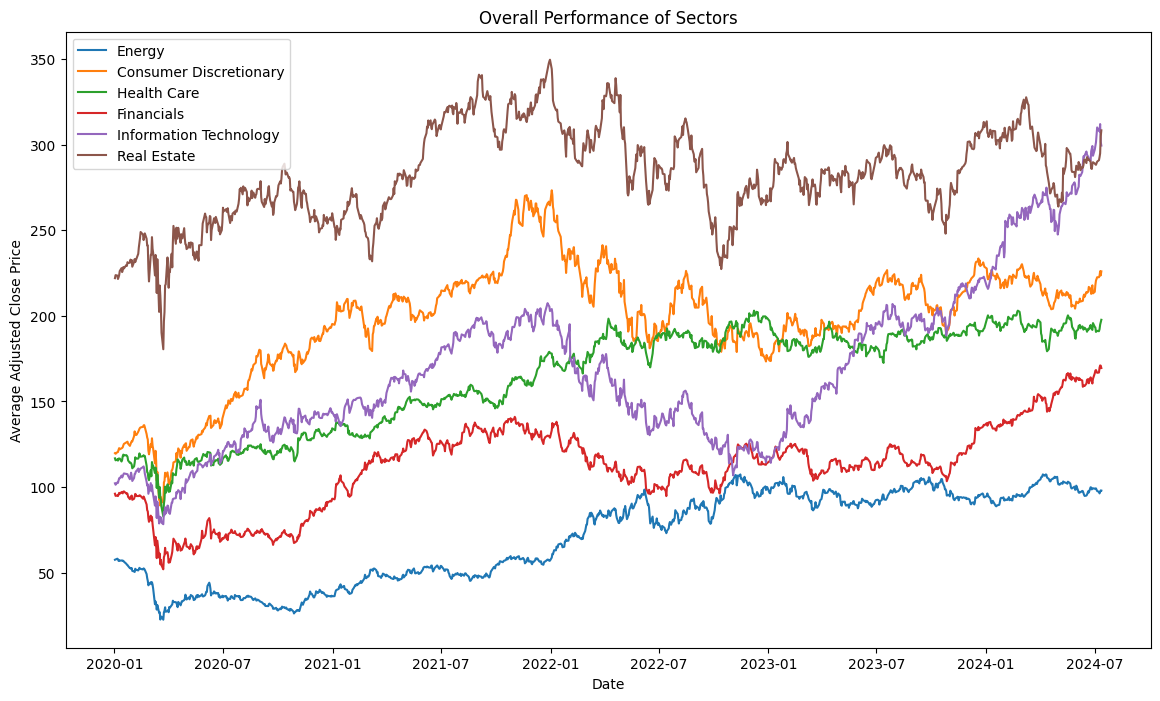

In [168]:
# Plot the overall performance of each sector
plt.figure(figsize=(14, 8))

for sector in average_prices_df.columns:
    plt.plot(average_prices_df.index, average_prices_df[sector], label=sector)

plt.title('Overall Performance of Sectors')
plt.xlabel('Date')
plt.ylabel('Average Adjusted Close Price')
plt.legend(loc='upper left', fontsize='medium')
plt.show()

## Conclusion
1. Real Estate Sector (Brown Line):
    - The Real Estate sector experienced a noticeable drop in early 2020.
    - It reached a peak around mid-2021 and has shown variability since then.
<br/>
2. Consumer Discretionary Sector (Orange Line):
    - The Consumer Discretionary sector shows significant fluctuations.
    - There was a substantial drop around early 2020, followed by a strong recovery and subsequent fluctuations.
    - The sector seems to have reached higher peaks around mid-2021 and has shown volatility since then.
<br/>
3. Information Technology Sector (Purple Line):
    - The Information Technology sector shows strong and consistent growth.
    - Despite an initial dip in early 2020, the sector quickly recovered and has shown a strong upward trend, reaching new highs.
<br/>
4. Health Care Sector (Green Line):
    - The Health Care sector shows steady growth with moderate fluctuations.
    - It experienced a dip in early 2020 but recovered quickly and has been on an upward trend since then.
<br/>
5. Financials Sector (Red Line):
    - The Financials sector experienced a significant drop in early 2020 but showed a steady recovery.
    - The performance has been relatively stable with a gradual upward trend since mid-2022.
<br/>
6. Energy Sector (Blue Line):
    - The Energy sector shows relatively stable performance with minor fluctuations.
    - There was a noticeable dip around early 2020, likely due to the initial impact of the COVID-19 pandemic, followed by a gradual increase.


---
- Volatility:

    - The Consumer Discretionary sector shows the highest volatility with a wide range of returns and multiple peaks in its distribution.
    - The Energy, Financials, and Real Estate sectors exhibit relatively lower volatility, with returns more concentrated around the mean.

<br/>

- Positive Skew:
    - The Health Care, Information Technology, and Real Estate sectors exhibit positive skew, indicating a higher frequency of `positive monthly returns`.

<br/>

- Normal Distribution:
    - The Energy and Financials sectors exhibit distributions that are approximately normal, suggesting `more predictable performance` with returns centered around the mean.

<br/>

- # Investment Insights:
    -  Low Volatility, Predictable Returns: Sectors like Financials and Energy might be suitable for risk-averse investors seeking stability.
    -  High Volatility, Potential High Returns: The Consumer Discretionary sector might attract investors looking for high potential returns but who are also willing to accept higher risk.
    -  Positive Return Potential: Health Care and Information Technology sectors show a tendency towards positive returns, making them attractive for growth-oriented investors.


---
# Heatmap of Correlation Between Sectors


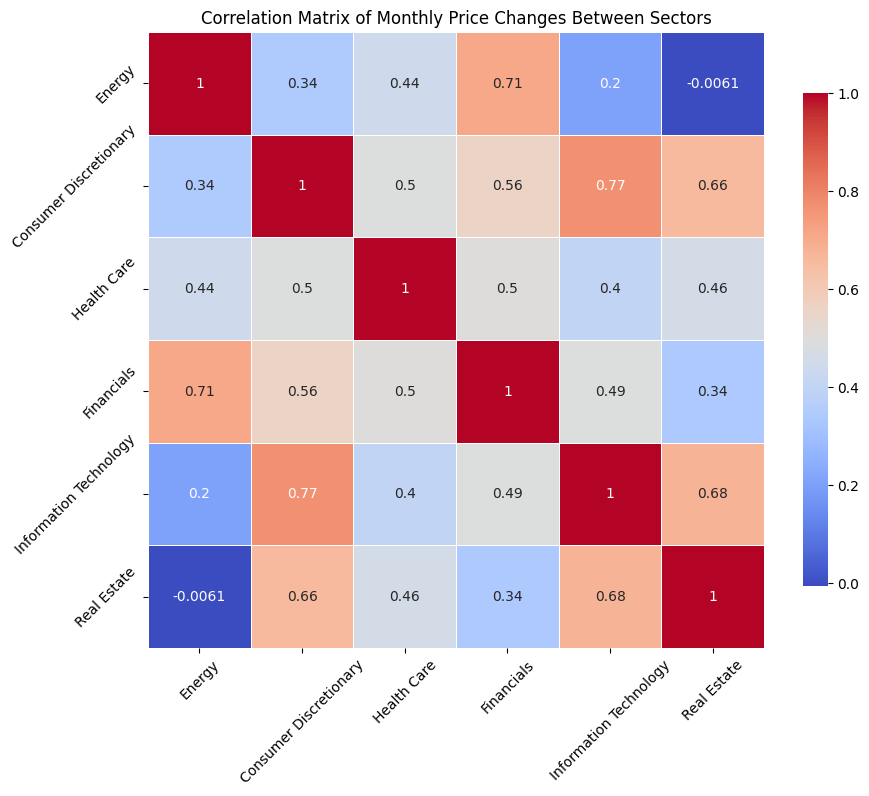

In [135]:
# Calculate the correlation matrix of the monthly price changes
correlation_matrix_price_change = monthly_price_change.corr()


# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_price_change, annot=True, cmap='coolwarm', linewidths=0.5, square=True, cbar_kws={'shrink': .8})
plt.title('Correlation Matrix of Monthly Price Changes Between Sectors')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


## Conclusion
The correlation matrix heatmap represents the correlation coefficients between the monthly price changes of various stock market sectors. The values range from -1 to 1, where:

- 1 indicates a perfect positive correlation,
- -1 indicates a perfect negative correlation, and
- 0 indicates no correlation.